In [2]:
from dataclasses import  dataclass
import json
from typing import TextIO

import jmespath
import matplotlib.pyplot as plt
import numpy as np


In [3]:
@dataclass
class Solution:
    x: np.ndarray
    t: np.ndarray
    pressure: np.ndarray
    density: np.ndarray
    velocity: np.ndarray
    mach_number: np.ndarray

    @classmethod
    def load(cls, f: TextIO) -> "Solution":
        records = list(map(json.loads, f))

        x = np.array(jmespath.search("[0].x", records))
        t = np.array(jmespath.search("[*].time", records))
        density = np.array(jmespath.search("[*].solution[*].density", records))
        pressure = np.array(jmespath.search("[*].solution[*].pressure", records))
        velocity = np.array(jmespath.search("[*].solution[*].velocity", records))
        mach_number = np.array(jmespath.search("[*].solution[*].mach_number", records))

        return cls(
            x=x,
            t=t,
            pressure=pressure,
            density=density,
            velocity=velocity,
            mach_number=mach_number,
        )


In [4]:
with open("stellar_wind/data/test_nh_zero.json") as f:
    static_solution = Solution.load(f)

In [5]:
with open("inputs/test_nh_small.json") as f:
    static_solution_nh_small = Solution.load(f)

In [6]:
with open("inputs/test_nh_medium.json") as f:
    static_solution_nh_medium = Solution.load(f)

In [7]:
with open("inputs/test_nh_large.json") as f:
    static_solution_nh_large = Solution.load(f)

In [8]:
with open("inputs/test_nh_xlarge.json") as f:
    static_solution_nh_xlarge = Solution.load(f)

In [9]:
with open("inputs/test_nh_xxlarge.json") as f:
    static_solution_nh_xxlarge = Solution.load(f)

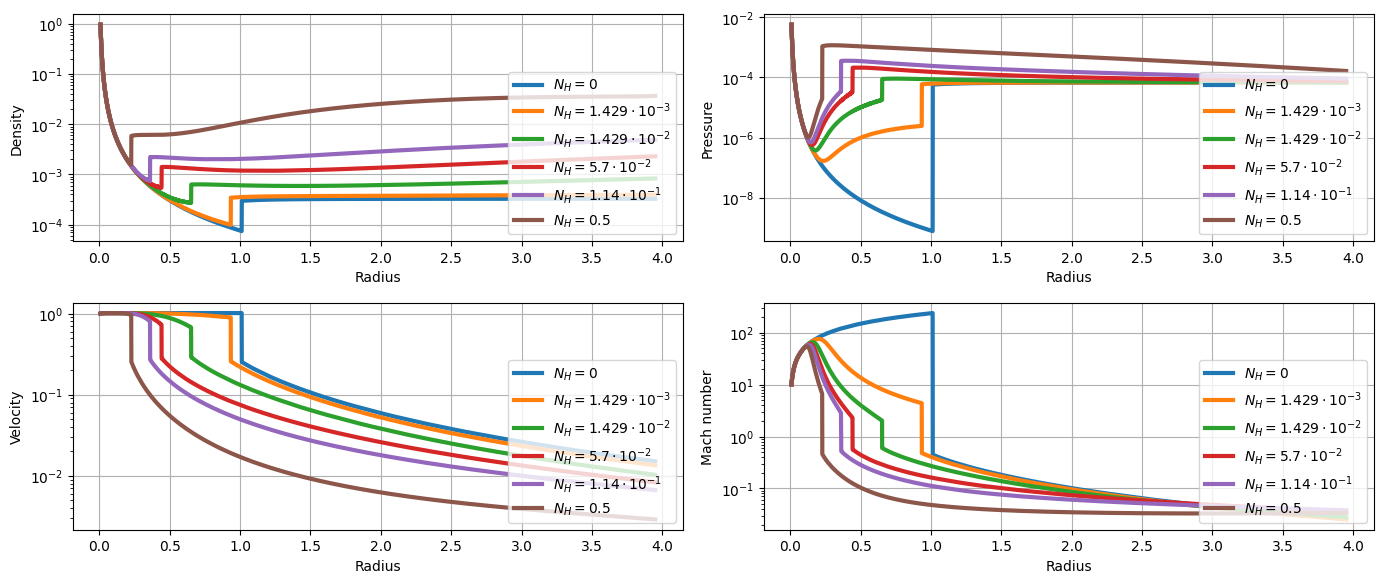

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))
# plt.rcParams.update({'font.size': 15})

i_min, i_max = 0, 11000
for solution, label in (
    (static_solution, "$N_H = 0$"),
    (static_solution_nh_small, "$N_H = 1.429 \cdot 10^{-3}$"),
    (static_solution_nh_medium, "$N_H = 1.429 \cdot 10^{-2}$"),
    (static_solution_nh_large, "$N_H = 5.7 \cdot 10^{-2}$"),
    (static_solution_nh_xlarge, "$N_H = 1.14 \cdot 10^{-1}$"),
    (static_solution_nh_xxlarge, "$N_H = 0.5$"),
):
    ax1.plot(
        solution.x[i_min:i_max], 
        solution.density[-1, i_min:i_max],
        linewidth=3,
        label=label,
    )
    ax1.grid(True)
    ax1.set_yscale("log")
    ax1.set_xlabel("Radius")
    ax1.set_ylabel("Density")
    ax1.legend(loc="lower right")

    ax2.plot(
        solution.x[i_min:i_max], 
        solution.pressure[-1, i_min:i_max],
        linewidth=3,
        label=label,
    )
    ax2.grid(True)
    ax2.set_yscale("log")
    ax2.set_xlabel("Radius")
    ax2.set_ylabel("Pressure")
    ax2.legend(loc="lower right")

    ax3.plot(
        solution.x[i_min:i_max], 
        solution.velocity[-1, i_min:i_max],
        linewidth=3,
        label=label,
    )
    ax3.grid(True)
    ax3.set_yscale("log")
    ax3.set_xlabel("Radius")
    ax3.set_ylabel("Velocity")
    ax3.legend(loc="lower right")

    ax4.plot(
        solution.x[i_min:i_max], 
        solution.mach_number[-1, i_min:i_max],
        linewidth=3,
        label=label,
    )
    ax4.grid(True)
    ax4.set_yscale("log")
    ax4.set_xlabel("Radius")
    ax4.set_ylabel("Mach number")
    ax4.legend(loc="lower right")

fig.tight_layout(pad=1.3)
fig.savefig("N_H_comparison.png")

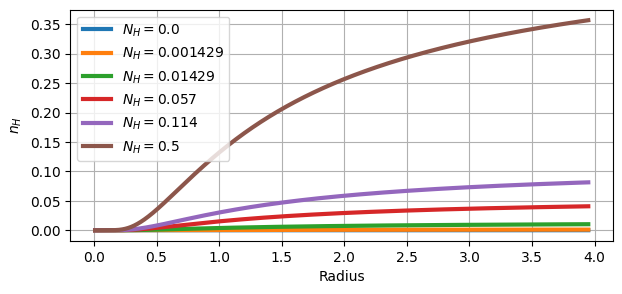

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

r_0 = 1.332
for n_h in (
    0.0, 
    1.429e-3, 
    1.429e-2,
    5.7e-2,
    1.14e-1,
    0.5,
):
    ax.plot(
        static_solution.x[:11000], 
        n_h * np.exp(- r_0 / static_solution.x[:11000]),
        linewidth=3,
        label=f"$N_H = {n_h}$"
    )
    ax.set_xlabel("Radius")
    ax.set_ylabel("$n_H$")
    ax.grid(True)
    ax.legend()

In [12]:
with open("static_solution/nh_xxlarge.json") as f:
    test_nh_xxlarge = Solution.load(f)

with open("static_solution/nh_xlarge.json") as f:
    test_nh_xlarge = Solution.load(f)

with open("static_solution/nh_large.json") as f:
    test_nh_large = Solution.load(f)

with open("static_solution/nh_medium.json") as f:
    test_nh_medium = Solution.load(f)

with open("static_solution/nh_small.json") as f:
    test_nh_small = Solution.load(f)

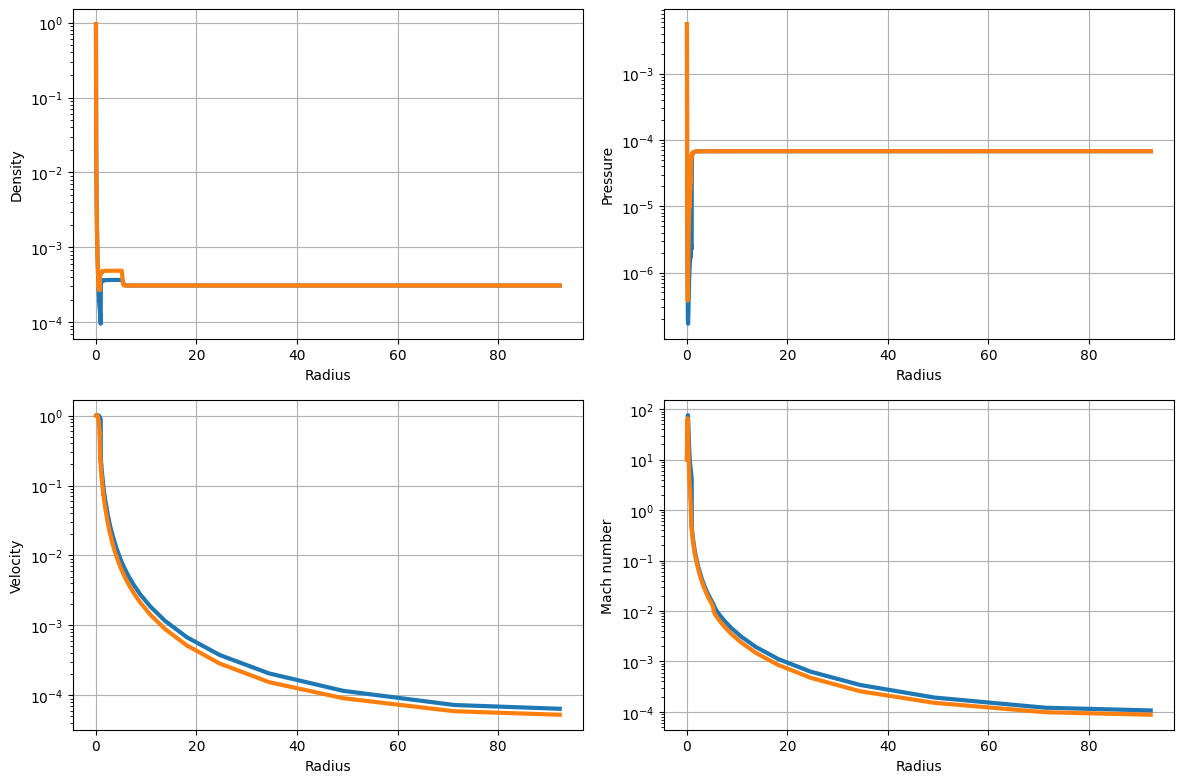

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

for s in (
    test_nh_small,
    test_nh_medium,
    # test_nh_large,
    # test_nh_xlarge,
    # test_nh_xxlarge,
):
    ax1.plot(
        s.x[0:], 
        s.density[-1, 0:],
        linewidth=3,
    )

    ax2.plot(
        s.x[0:], 
        s.pressure[-1, 0:],
        linewidth=3,
    )

    ax3.plot(
        s.x[0:], 
        s.velocity[-1, 0:],
        linewidth=3,
    )

    ax4.plot(
        s.x[0:], 
        s.mach_number[-1, 0:],
        linewidth=3,
    )

ax1.set_yscale("log")
ax1.set_xlabel("Radius")
ax1.set_ylabel("Density")
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Radius")
ax2.set_ylabel("Pressure")
ax2.grid(True)

ax3.set_yscale("log")
ax3.set_xlabel("Radius")
ax3.set_ylabel("Velocity")
ax3.grid(True)

ax4.set_yscale("log")
ax4.set_xlabel("Radius")
ax4.set_ylabel("Mach number")
ax4.grid(True)

fig.tight_layout(pad=1.3)

In [25]:
payload = {
    "time": test_nh_large.t[-1],
    "x": list(test_nh_large.x),
    "solution": [
        {
            "pressure": test_nh_large.pressure[-1, i],
            "density": test_nh_large.density[-1, i],
            "velocity": test_nh_large.velocity[-1, i],
            "mach_number": test_nh_large.mach_number[-1, i],
        }
        for i in range(len(test_nh_large.x))
    ]
}
with open("static_solution/nh_large.json", "w") as f:
    json.dump(payload, f)
